# Projeto Turing - Análise de Dados - Doenças Cardiovasculares
# Autor: Caio Vilquer Carvalho

[Dataset link](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Descrição do Dataset:

| Nome da Feature | Descrição | Tipo (e Subtipo) | Valores Comuns/Intervalo|
|-----------------|-----------|------------------|-----------------------------------------------|
| id              | Identificador único para cada paciente | Categórica (Nominal) | Valores únicos |
| age             | Idade do paciente em anos | Numérica (Contínua) | Anos (ex: 29-77) |
| origin          | Local de estudo | Categórica (Nominal) | Locais diversos |
| sex             | Gênero do paciente | Categórica (Binária) | Male/Female (Masculino/Feminino) |
| cp              | Tipo de dor no peito | Categórica (Nominal) | typical angina, atypical angina, non-anginal, asymptomatic |
| trestbps        | Pressão arterial em repouso | Numérica (Contínua) | mm Hg na admissão ao hospital (ex: 94-200) |
| chol            | Colesterol sérico | Numérica (Contínua) | mg/dl (ex: 126-564) |
| fbs             | Açúcar no sangue em jejum > 120 mg/dl | Categórica (Binária) | True/False (Verdadeiro/Falso) |
| restecg         | Resultados eletrocardiográficos em repouso | Categórica (Nominal) | normal, stt abnormality, lv hypertrophy |
| thalach         | Frequência cardíaca máxima atingida | Numérica (Contínua) | Batimentos por minuto (ex: 71-202) |
| exang           | Angina induzida por exercício | Categórica (Binária) | True/False (Verdadeiro/Falso) |
| oldpeak         | Depressão do segmento ST induzida pelo exercício em relação ao repouso | Numérica (Contínua) | (ex: 0-6.2) |
| slope           | Inclinação do segmento ST no pico do exercício | Categórica (Nominal) | Valores variados |
| ca              | Número de vasos principais (0-3) coloridos por fluoroscopia | Numérica (Discreta) | 0, 1, 2, 3 |
| thal            | Talassemia (tipo de desordem sanguínea) | Categórica (Nominal) | normal, fixed defect, reversible defect |
| num  | Diagnóstico de doença cardíaca (variável alvo) | Categórica (Ordinal/Binária) | Valores variados indicando presença/severidade da doença |

## Importação das bibliotecas usadas

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento do dataset e primeiras impressões

In [31]:
# Configurações visuais básicas
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

# 1.1) Carregamento
df = pd.read_csv('heart_disease_uci.csv')

# 1.2) Visão geral
display(df.head())
display(df.tail())
df.info()
print('\nValores ausentes por coluna:')
print(df.isna().sum().sort_values(ascending=False))

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Valores ausentes por coluna:
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exa

A análise inicial do dataset revela que os dados provenientes da localidade de Cleveland apresentam maior completude, sem registros nulos nas variáveis analisadas. Em contrapartida, as demais localidades possuem diferentes proporções de valores ausentes em diversas colunas, como `trestbps`, `chol`, `fbs`, `restecg`, `thalch`, `exang`, `oldpeak`, `slope`, `ca` e `thal`. 

Portanto, será necessário realizar um processo de limpeza e imputação de dados ausentes para essas localidades, a fim de garantir a qualidade e a consistência do conjunto de dados utilizado no desenvolvimento e avaliação dos modelos preditivos. A escolha da estratégia de tratamento (remoção de linhas, imputação por média/mediana/moda ou uso de algoritmos específicos para dados faltantes) dependerá da análise detalhada da distribuição dos valores nulos em cada variável e do impacto potencial na performance dos modelos.

### Conversão de tipos object em tipos correspondentes e verificação de duplicatas

In [32]:
# Booleanas
bool_cols = ['fbs', 'exang']
df[bool_cols] = df[bool_cols].astype('boolean')

# Categóricas
cat_cols = ['sex', 'cp', 'restecg', 'slope', 'thal', 'dataset']
for c in cat_cols:
    df[c] = df[c].astype('category')

# Target (severidade 0-4) → inteiro
df['num'] = df['num'].astype('int8')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        920 non-null    int64   
 1   age       920 non-null    int64   
 2   sex       920 non-null    category
 3   dataset   920 non-null    category
 4   cp        920 non-null    category
 5   trestbps  861 non-null    float64 
 6   chol      890 non-null    float64 
 7   fbs       830 non-null    boolean 
 8   restecg   918 non-null    category
 9   thalch    865 non-null    float64 
 10  exang     865 non-null    boolean 
 11  oldpeak   858 non-null    float64 
 12  slope     611 non-null    category
 13  ca        309 non-null    float64 
 14  thal      434 non-null    category
 15  num       920 non-null    int8    
dtypes: boolean(2), category(6), float64(5), int64(2), int8(1)
memory usage: 61.2 KB


Essa etapa de conversão dos tipos de dados é fundamental para garantir que cada coluna do dataset seja interpretada corretamente pelas bibliotecas de análise e modelagem. Ao transformar variáveis booleanas e categóricas para seus tipos apropriados, otimizamos o uso de memória, facilitamos a aplicação de técnicas estatísticas e de machine learning, e reduzimos o risco de erros durante o processamento dos dados. Além disso, essa padronização contribui para a eficiência computacional e para a reprodutibilidade dos resultados, tornando o fluxo de trabalho mais robusto e confiável.

In [33]:
duplicados = df[df.duplicated(keep='first')]  # Verifica se há linhas duplicadas
duplicados.shape # Mostra a quantidade de linhas duplicadas

(0, 16)

Como é possível ver, não há registros duplicados que poderiam prejudicar a análise

## Partindo para a Análise exploratória de dados

### Idade

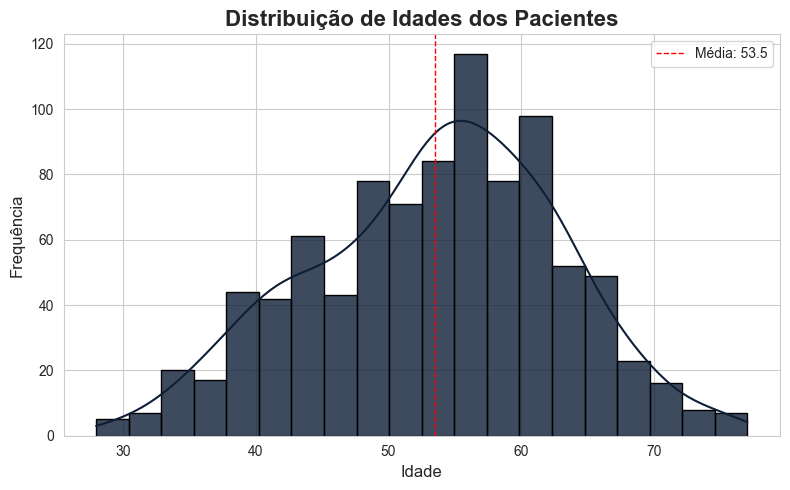

Idade Maxima: 28, Idade Mínima 77
Assimetria: -0.20


In [34]:
sns.set_style('whitegrid')
sns.histplot(df['age'], bins=20, kde=True, color="#0E1E36", edgecolor='black', alpha=0.8)
media_idade = df['age'].mean()
assimetria = df['age'].skew()
plt.axvline(media_idade, color='red', linestyle='--', linewidth=1, label=f'Média: {media_idade:.1f}')
plt.title('Distribuição de Idades dos Pacientes', fontsize=16, fontweight='bold')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
print(f"Idade Maxima: {df['age'].min()}, Idade Mínima {df['age'].max()}") 
print(f"Assimetria: {assimetria:.2f}")

A distribuição de idades dos pacientes apresenta perfil aproximadamente simétrico (assimetria ≈ -0.20), sem cauda evidente para valores mais jovens ou mais velhos. A média de idade é aproximadamente 53,5 anos, sugerindo que o estudo abrange predominantemente adultos de meia-idade e idosos, faixa etária em que a incidência de doenças cardiovasculares tende a aumentar. Essa característica é relevante para a análise, pois reforça a importância de investigar fatores de risco e padrões clínicos nesse grupo, além de alertar para possíveis vieses caso se deseje generalizar os resultados para populações mais jovens. A ausência de valores extremos ou outliers evidentes também contribui para a robustez das análises subsequentes envolvendo a variável idade.

### Sexo

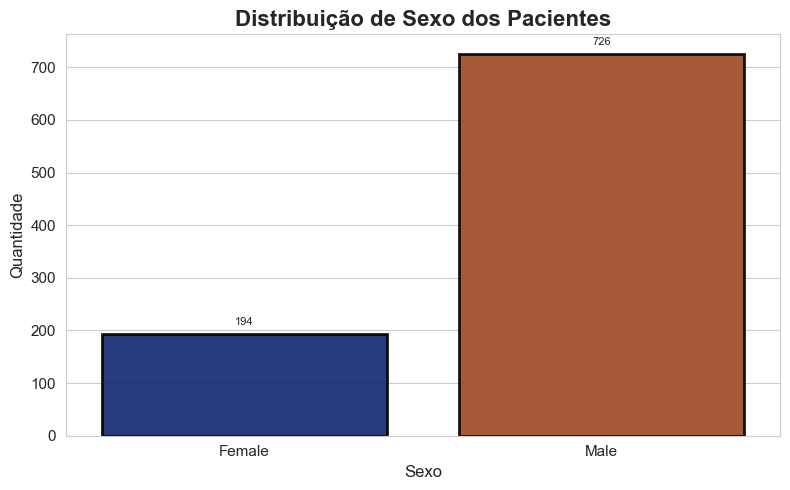

Porcentagem de Pacientes do Sexo Masculino: 78.91%


In [35]:
ax = sns.countplot(data=df, x='sex', edgecolor='black', linewidth=2, hue='sex', palette='dark', alpha=0.9)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=5)
plt.title('Distribuição de Sexo dos Pacientes', fontsize=16, fontweight='bold')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Porcentagem de Pacientes do Sexo Masculino: {df.sex.value_counts(normalize=True)['Male']:.2%}")


A distribuição do sexo dos pacientes no dataset revela um desbalanceamento significativo entre homens e mulheres, com predominância do sexo masculino. Esse viés de gênero pode impactar diretamente a análise exploratória e, principalmente, a construção de modelos preditivos. Modelos treinados em dados desbalanceados tendem a aprender padrões majoritariamente do grupo mais representado (neste caso, homens), podendo apresentar menor desempenho na predição de eventos para o grupo sub-representado (mulheres).

Além disso, fatores de risco, sintomas e manifestações clínicas de doenças cardiovasculares podem diferir entre os sexos, o que reforça a importância de considerar esse viés na interpretação dos resultados.

Portanto, a representatividade desigual entre homens e mulheres deve ser levada em conta tanto na análise descritiva quanto na modelagem, para evitar conclusões enviesadas e garantir maior generalização dos resultados.

### Localidade

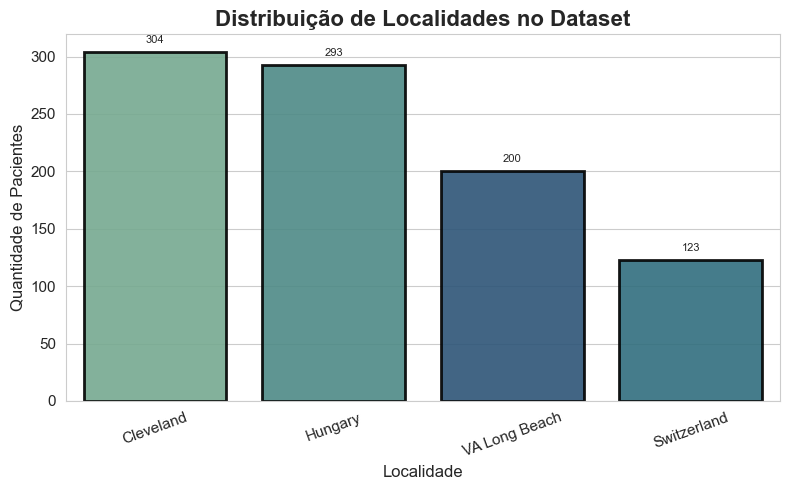

In [36]:
ax_local = sns.countplot(data=df, x='dataset', order=df['dataset'].value_counts().index,
                         hue='dataset',palette='crest', edgecolor='black', linewidth=2, alpha=0.9)
for container in ax_local.containers:
    ax_local.bar_label(container, fmt='%d', fontsize=8, padding=5)
plt.title('Distribuição de Localidades no Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Localidade', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

A análise da distribuição das localidades no dataset revela uma predominância de registros provenientes de Cleveland, enquanto as demais localidades (como VA Long Beach, entre outras) apresentam menor representatividade. Esse desbalanceamento é importante, pois impacta diretamente a consistência e a qualidade das informações disponíveis para cada localidade.

Conforme observado na análise inicial, os dados de Cleveland são os mais completos, praticamente sem valores ausentes nas principais variáveis clínicas. Em contrapartida, as demais localidades apresentam diferentes proporções de valores nulos em variáveis essenciais, como pressão arterial, colesterol, frequência cardíaca máxima, entre outras. Isso pode ser reflexo de diferenças nos protocolos de coleta, infraestrutura ou até mesmo prioridades clínicas locais.

No contexto da análise de dados, essa heterogeneidade exige cautela: modelos preditivos treinados majoritariamente com dados de Cleveland podem não generalizar bem para pacientes de outras localidades, especialmente se as variáveis mais relevantes estiverem ausentes ou incompletas nesses grupos. Além disso, comparações diretas entre localidades podem ser enviesadas pela diferença na completude dos dados.


### Sexo por localidade

sex,Female,Male
dataset,,
Cleveland,97,207
Hungary,81,212
Switzerland,10,113
VA Long Beach,6,194


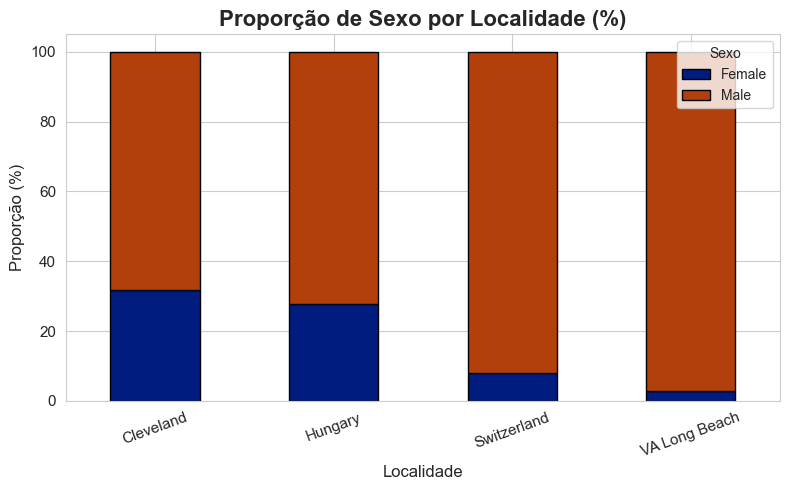

Cleveland: 68.09% masculino, 31.91% feminino
Hungary: 72.35% masculino, 27.65% feminino
Switzerland: 91.87% masculino, 8.13% feminino
VA Long Beach: 97.0% masculino, 3.0% feminino


In [37]:
# Análise da distribuição de sexo por localidade
sexo_local = pd.crosstab(df['dataset'], df['sex'])
display(sexo_local)
sexo_local = sexo_local.div(sexo_local.sum(axis=1), axis=0) * 100  # Converte para porcentagem
sexo_local = sexo_local.round(2)

sexo_local.plot(kind='bar', stacked=True, color=sns.color_palette('dark'), edgecolor='black', linewidth=1)
plt.title('Proporção de Sexo por Localidade (%)', fontsize=16, fontweight='bold')
plt.xlabel('Localidade', fontsize=12)
plt.ylabel('Proporção (%)', fontsize=12)
plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

# Interpretação dos possíveis vieses
for loc in sexo_local.index:
    print(f"{loc}: {sexo_local.loc[loc, 'Male']}% masculino, {sexo_local.loc[loc, 'Female']}% feminino")


A análise da distribuição de sexo por localidade, evidencia diferenças marcantes na proporção de homens e mulheres entre os centros participantes do estudo. Por exemplo, em Cleveland, cerca de 68% dos pacientes são do sexo masculino, enquanto em VA Long Beach esse percentual chega a 97%, indicando uma sub-representação extrema de mulheres nessa localidade. Já em Switzerland, a proporção de mulheres é ainda menor, com apenas 8% dos registros.

Essas discrepâncias sugerem a presença de vieses amostrais importantes, que podem impactar tanto a análise descritiva quanto a modelagem preditiva. Modelos treinados com dados predominantemente masculinos tendem a capturar padrões específicos desse grupo, reduzindo a capacidade de generalização para pacientes do sexo feminino. Além disso, diferenças regionais na coleta de dados, protocolos clínicos ou acesso ao sistema de saúde podem reforçar esses vieses, dificultando comparações diretas entre localidades.

Portanto, é fundamental considerar essas limitações ao interpretar os resultados, adotando estratégias para mitigar o impacto do desbalanceamento de gênero a fim de garantir maior equidade e robustez nas conclusões extraídas do dataset.

### Pressão arterial por idade

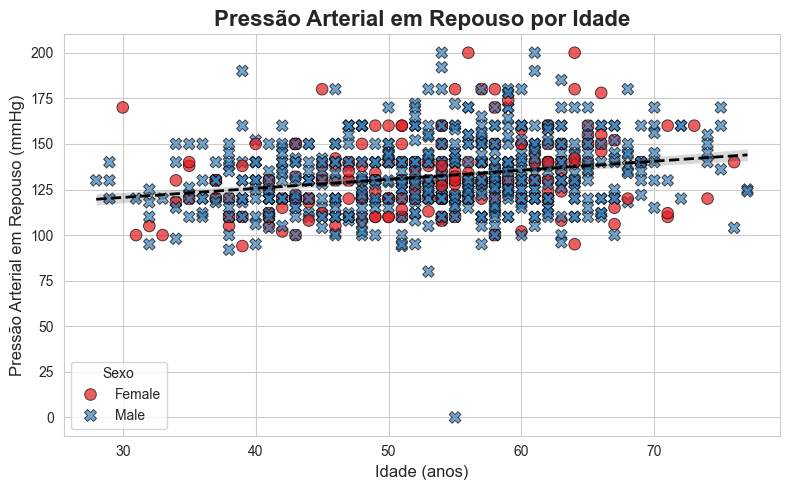

In [38]:
sns.set_style('whitegrid')
sns.scatterplot(data=df, x='age', y='trestbps', hue='sex', style='sex',
                palette='Set1', alpha=0.7, edgecolor='black', s=70)
sns.regplot(data=df, x='age', y='trestbps', scatter=False, color='black', 
            line_kws={'linewidth':2, 'linestyle':'--'}, ci=95)
plt.title('Pressão Arterial em Repouso por Idade', fontsize=16, fontweight='bold')
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Pressão Arterial em Repouso (mmHg)', fontsize=12)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

A análise do gráfico de dispersão da pressão arterial em repouso (trestbps) por idade, segmentado por sexo, revela alguns padrões importantes para o entendimento do perfil dos pacientes do estudo. Observa-se uma tendência discreta de aumento da pressão arterial com o avanço da idade, evidenciada pela linha de regressão positiva, embora a dispersão dos pontos indique considerável variabilidade individual.

Homens e mulheres apresentam distribuições semelhantes de pressão arterial ao longo das faixas etárias, mas a maior concentração de pacientes do sexo masculino no dataset pode influenciar a média geral observada. Não há diferença visual marcante entre os sexos quanto à relação idade-pressão arterial, sugerindo que, neste conjunto de dados, o fator idade exerce papel mais relevante do que o sexo na determinação da pressão arterial em repouso.

A presença de valores extremos, principalmente em pacientes mais idosos, pode indicar casos de hipertensão não controlada ou situações clínicas específicas, devendo ser analisados com cautela para evitar distorções nas conclusões. Além disso, a dispersão dos dados reforça a importância de considerar múltiplos fatores de risco na avaliação cardiovascular, e não apenas a idade isoladamente.

No contexto do estudo, compreender a relação entre idade, sexo e pressão arterial é fundamental, pois a hipertensão é um dos principais fatores de risco para doenças cardiovasculares. A análise sugere que intervenções preventivas devem ser direcionadas especialmente para faixas etárias mais avançadas, independentemente do sexo, e que a avaliação individualizada permanece essencial devido à variabilidade observada.


### Observação de possíveis inconsistencias e de outliers nos dados numéricos

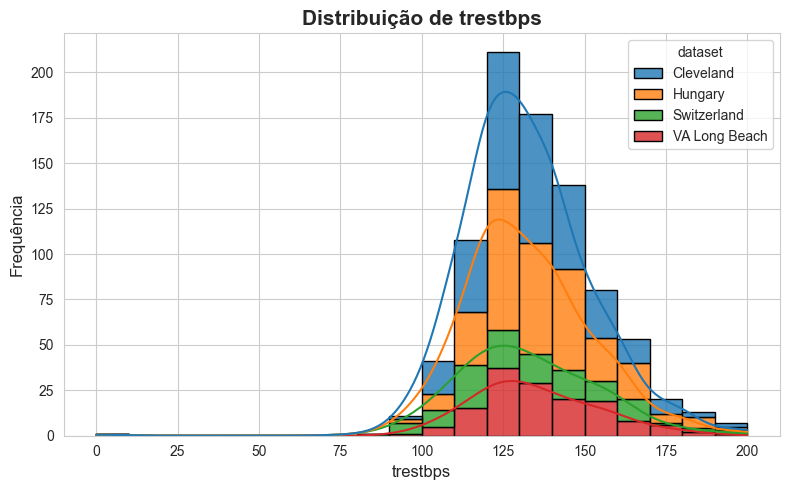

trestbps: nulos=59, min=0.00, max=200.00, média=132.13, mediana=130.00, desvio=19.07, assimetria=0.21



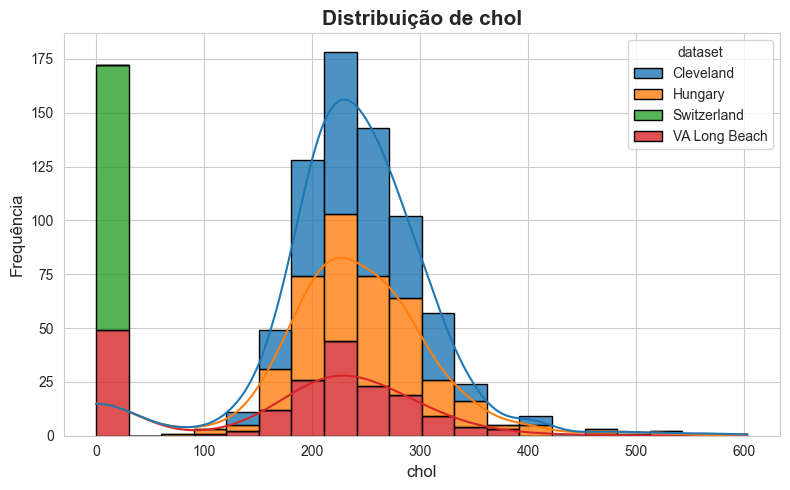

chol: nulos=30, min=0.00, max=603.00, média=199.13, mediana=223.00, desvio=110.78, assimetria=-0.61



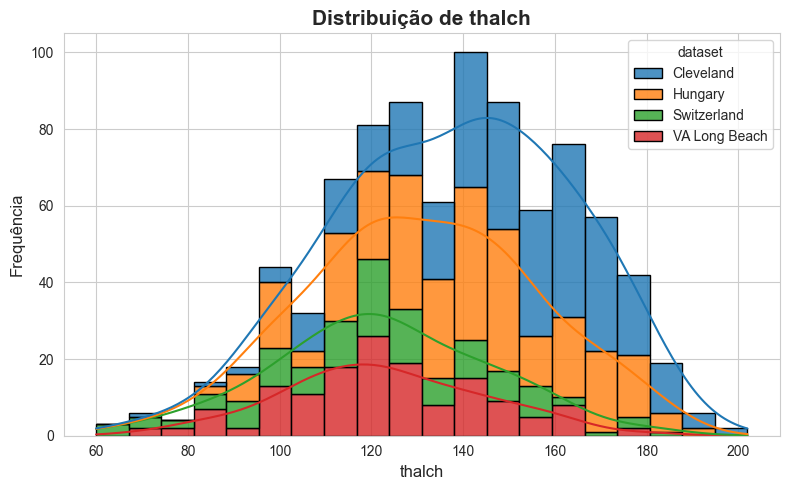

thalch: nulos=55, min=60.00, max=202.00, média=137.55, mediana=140.00, desvio=25.93, assimetria=-0.21



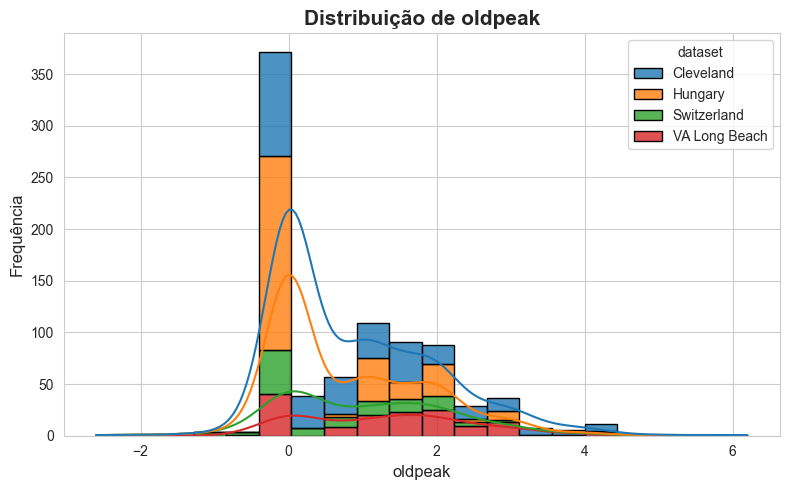

oldpeak: nulos=62, min=-2.60, max=6.20, média=0.88, mediana=0.50, desvio=1.09, assimetria=1.04



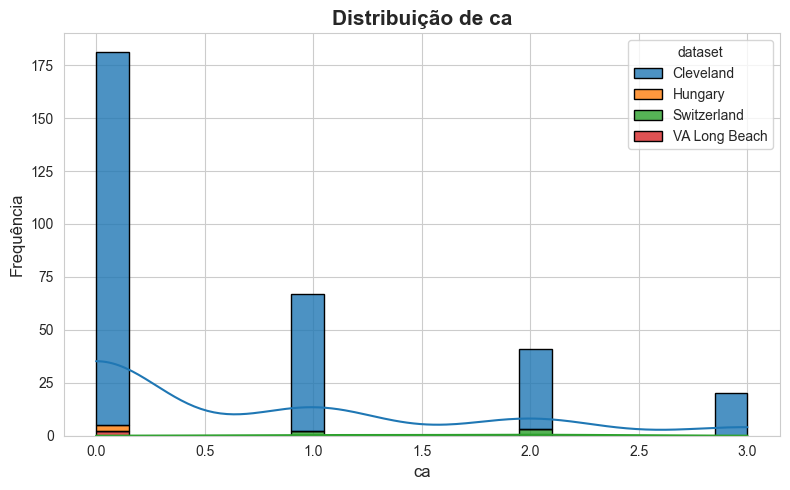

ca: nulos=611, min=0.00, max=3.00, média=0.68, mediana=0.00, desvio=0.94, assimetria=1.17



In [39]:
sns.set_style('whitegrid')
features_num = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in features_num:
    plt.figure()
    sns.histplot(data=df, x=col, hue='dataset', bins=20, kde=True, edgecolor='black', alpha=0.8, multiple='stack')
    plt.title(f'Distribuição de {col}', fontsize=15, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Análise numérica
    nulos = df[col].isna().sum()
    minimo = df[col].min()
    maximo = df[col].max()
    media = df[col].mean()
    mediana = df[col].median()
    desvio = df[col].std()
    assimetria = df[col].skew()
    print(f"{col}: nulos={nulos}, min={minimo:.2f}, max={maximo:.2f}, média={media:.2f}, mediana={mediana:.2f}, desvio={desvio:.2f}, assimetria={assimetria:.2f}\n")


#### Pressão Arterial em Repouso (trestbps)

A distribuição da pressão arterial em repouso apresenta uma assimetria positiva, indicando uma concentração maior de valores na faixa considerada normal a levemente elevada, com uma cauda estendida para valores mais altos. Os valores mínimos registrados estão próximos de 94 mmHg, enquanto os máximos alcançam 200 mmHg, o que representa um intervalo clinicamente plausível, embora os valores extremos mereçam atenção.

Existe a presença de um registro inconsistente de pressão zerada, o qual deve ser tratado posteriormente. A concentração de valores na faixa de 120-140 mmHg reflete a predominância de pacientes com pressão normal a pré-hipertensão, enquanto os valores acima de 160 mmHg indicam casos de hipertensão mais severa, potencialmente associados a maior risco cardiovascular.

#### Colesterol Sérico (chol)

O histograma do colesterol sérico demonstra uma distribuição com assimetria positiva moderada, com valores concentrados principalmente entre 200-250 mg/dl, considerados limítrofes na prática clínica. A distribuição estende-se até valores extremos que ultrapassam 500 mg/dl, representando casos de hiperlipidemia severa.

Um ponto crítico na análise é a presença de valores anormalmente baixos ou zerados nos registros provenientes da Suíça, o que sugere inconsistência na coleta dos dados ou erro de codificação. Valores de colesterol abaixo de 100 mg/dl são raros em adultos e clinicamente improváveis para a população estudada. A multimodalidade observada na distribuição pode refletir diferenças na composição demográfica entre os diferentes centros de estudo, reforçando a importância de considerar a variabilidade entre localidades.

#### Frequência Cardíaca Máxima (thalch)

A distribuição da frequência cardíaca máxima apresenta um padrão aproximadamente normal, com ligeira assimetria negativa, indicando uma tendência a valores mais baixos que o esperado para a população geral. Os valores variam principalmente entre 71 e 202 batimentos por minuto, intervalo fisiologicamente plausível para testes de esforço em diferentes faixas etárias.

A concentração de valores mais baixos pode ser explicada pela idade média mais elevada da amostra e pela possível presença de cardiopatias limitantes. A distribuição mais equilibrada desta variável, com menor proporção de valores extremos ou inconsistentes, sugere maior confiabilidade desta medida em comparação com outras variáveis do dataset.

#### Depressão do Segmento ST (oldpeak)

A análise do oldpeak revela uma distribuição fortemente assimétrica positiva, com uma concentração expressiva de valores próximos a zero e uma cauda longa estendendo-se até valores superiores a 6. Esta característica é consistente com a natureza do parâmetro, que geralmente apresenta valores baixos em indivíduos saudáveis e elevados em pacientes com isquemia miocárdica.

A bimodalidade sutil observada pode indicar a existência de dois subgrupos distintos: pacientes sem alterações significativas do segmento ST e aqueles com depressão evidente, sugestiva de doença coronariana. A discrepância na distribuição de valores entre diferentes localidades sugere possíveis diferenças nos protocolos de testes ergométricos ou na interpretação dos resultados eletrocardiográficos, representando um potencial viés metodológico.

#### Número de Vasos Principais (ca)

A distribuição da variável ca, que representa o número de vasos principais comprometidos (0-3) identificados por fluoroscopia, apresenta natureza discreta com picos nos valores inteiros esperados. Observa-se uma concentração notável em zero (ausência de comprometimento vascular significativo), com frequência decrescente para valores mais elevados.

Esta variável apresenta uma proporção considerável de dados ausentes, particularmente nas localidades fora de Cleveland, comprometendo a generalização dos achados. A distribuição assimétrica positiva reflete a realidade epidemiológica, onde a maioria dos pacientes avaliados não apresenta obstrução coronariana significativa em múltiplos vasos. A consistência dos valores (restritos ao intervalo 0-3) sugere integridade na codificação desta variável, embora o elevado número de dados faltantes represente uma limitação importante para análises mais abrangentes.

#### Considerações Gerais

A análise conjunta das variáveis numéricas revela padrões de distribuição consistentes com a epidemiologia das doenças cardiovasculares, porém com limitações importantes relacionadas à incompletude dos dados e possíveis inconsistências entre localidades. A heterogeneidade na qualidade dos registros, com Cleveland apresentando dados mais completos e consistentes, sugere cautela na interpretação dos resultados e na construção de modelos preditivos. As inconsistências identificadas, especialmente nos valores de colesterol, reforçam a necessidade de procedimentos de limpeza e validação antes de análises mais avançadas.

### Análise da correlação entre features e target

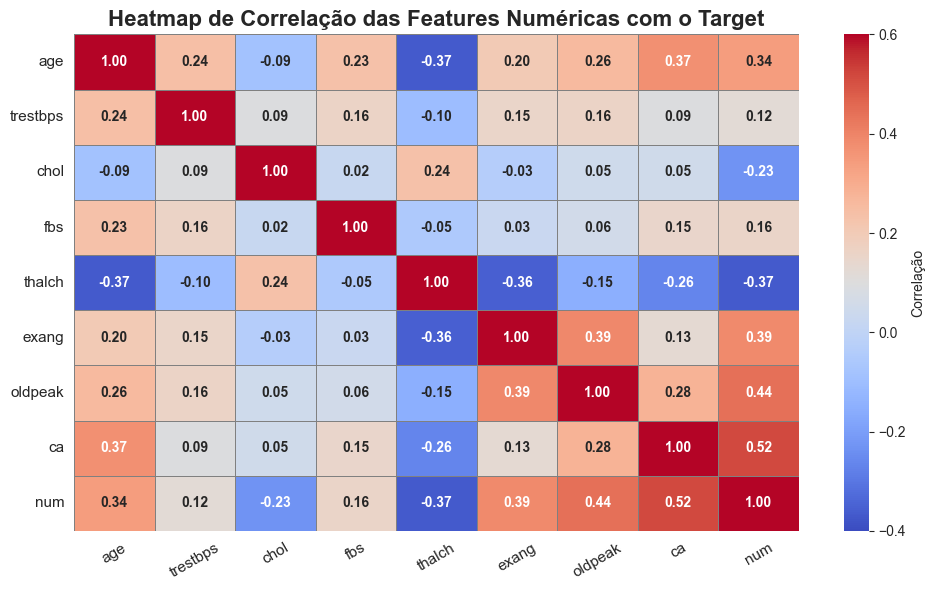

In [40]:
# Calcula a matriz de correlação apenas para colunas numéricas
corr = df.drop(columns=['id']).corr(numeric_only=True)  # Remove a coluna 'id' se existir
# Cria o heatmap estilizado
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-0.40,
    vmax=0.6,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Correlação'},
    annot_kws={"size": 10, "weight": "bold"}
)
plt.title('Heatmap de Correlação das Features Numéricas com o Target', fontsize=16, fontweight='bold')
plt.xticks(fontsize=11, rotation=30)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
plt.show()


### Análise Descritiva das Correlações com o Resultado (num)

A matriz de correlação apresentada no heatmap evidencia quais variáveis numéricas possuem maior relação linear com o desfecho de interesse (`num`), que representa a presença e severidade da doença cardíaca. Os principais fatores que se destacam são:

- **Número de Vasos Principais (ca):**  
    Apresenta a maior correlação positiva com o resultado (`0.52`). Isso indica que quanto maior o número de vasos principais comprometidos, maior a probabilidade e/ou severidade da doença cardíaca. Esse achado é consistente com o conhecimento clínico, pois a obstrução de múltiplos vasos é um forte indicativo de doença coronariana avançada.

- **Depressão do Segmento ST (oldpeak):**  
    Com correlação de `0.44`, valores mais altos de `oldpeak` (depressão do segmento ST durante o teste de esforço) estão associados a maior gravidade da doença. Esse parâmetro reflete isquemia miocárdica induzida por esforço, sendo um marcador importante de risco cardiovascular.

- **Angina Induzida por Exercício (exang):**  
    Correlação de `0.39` sugere que pacientes que apresentam angina durante o esforço têm maior chance de diagnóstico positivo para doença cardíaca. A presença desse sintoma durante o teste ergométrico é classicamente associada a maior risco.

- **Frequência Cardíaca Máxima (thalch):**  
    Correlação negativa de `-0.37` indica que valores mais baixos de frequência cardíaca máxima atingida estão relacionados a maior gravidade da doença. Isso pode refletir limitação funcional causada pela própria cardiopatia.

- **Idade:**  
    Correlação de `0.34` mostra que a idade é um fator relevante, com pacientes mais velhos apresentando maior risco de doença cardíaca, o que está de acordo com a literatura médica.

- **Pressão Arterial em Repouso (trestbps) e Colesterol (chol):**  
    Apresentam correlações mais baixas com o desfecho (`0.12` e `-0.23`, respectivamente), sugerindo que, isoladamente, têm menor impacto preditivo no diagnóstico/severidade da doença cardíaca neste conjunto de dados.

- **Glicemia em Jejum (fbs):**  
    Correlação de `0.16` indica uma relação positiva, porém modesta, entre glicemia elevada e doença cardíaca.

#### Considerações Finais

Os fatores mais impactantes para o desfecho são, portanto, o número de vasos comprometidos, a depressão do segmento ST, a presença de angina induzida por exercício, a frequência cardíaca máxima atingida e a idade. Esses achados reforçam a importância de uma avaliação multifatorial no risco cardiovascular, alinhando-se com o conhecimento clínico e epidemiológico sobre a doença arterial coronariana. Variáveis como pressão arterial e colesterol, embora relevantes, apresentam menor correlação linear neste contexto, possivelmente devido à influência de outros fatores ou à distribuição dos dados no dataset.